## 1. Introduction & Market Analysis

### 1.1 Company Context
**Company I** is an IT consulting firm currently facing a critical challenge with employee retention. In the specialized field of IT Consulting, human capital is the primary asset; when employees leave, they take valuable technical knowledge and client relationships with them. We have been tasked with analyzing a historical dataset of ~1,500 employees to diagnose the root causes of attrition and propose a data-driven solution.

### 1.2 Market Analysis (IT Industry Trends 2024-2025)

To understand Company I's position, we must look at the broader landscape of the Technology sector.

**1. The "Turnover Tax" is Rising**
The technology sector continues to face one of the highest turnover rates of any industry. According to recent data from **LinkedIn** and **Gartner**, the tech turnover rate hovers between **13% and 15%**, significantly higher than the 10% average across other sectors.
* **The Cost:** Losing talent is expensive. **SHRM (Society for Human Resource Management)** estimates that replacing a technical employee costs between **150% to 200%** of their annual salary due to recruitment fees, onboarding time, and lost productivity.
    * *Reference:* [SHRM Cost of Turnover Data](https://www.shrm.org)

**2. The Shift to "Total Rewards" (Why Money Matters Again)**
While "culture" was the buzzword of the past, the current economic climate (inflation and cost of living) has shifted the focus back to financial stability. A **2024 Global Talent Trends** report highlights that **Compensation** (specifically the ratio of pay to performance) has returned as the #1 driver for employees seeking new jobs.
* **Relevance:** This suggests that flat salary structures may no longer work. Employees are looking for **dynamic incentives** that reflect their output.
    * *Reference:* [Mercer Global Talent Trends](https://www.mercer.com/en-us/insights/talent-and-transformation/global-talent-trends/)

**3. The "Silent Burnout" Epidemic**
Tech employees report some of the highest rates of burnout. A study by **Yerbo** found that **42% of tech workers** face high levels of burnout, often driven by a disconnect between management expectations and employee reality.
* **Relevance:** High stress without adequate reward is the fastest accelerator of attrition.
    * *Reference:* [The State of Burnout in Tech](https://yerbo.co)

### 1.3 Strategic Hypothesis**
Based on these market trends, our analysis will specifically investigate the relationship between **Financial Incentives** and **Workplace Stress** within Company I to determine if we are facing a systemic compensation issue or a cultural burnout issue.

## 2. Setup and Data Loading

### 2.1 Import libraries
First, we import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
import lightgbm as lgb

# Set plot style
sns.set(style="whitegrid")

### 2.2 Connect with Google Drive
To load the data, we first need to connect this Colab notebook with Google Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/CGI Global/Final Assignment"

/content/drive/MyDrive/CGI Global/Final Assignment


In [4]:
import os
from pathlib import Path

# Automatically get the current working directory
current_dir = Path(os.getcwd())

# Define file paths using pathlib
file_path = current_dir / "dataset" / "data.csv"

# Check if path exists
if file_path.exists():
    print("The file exist and path is correctly set.")
else:
    print("The file is missing or path is not correctly set.")

The file exist and path is correctly set.


Let's display the data.

In [5]:
# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head(10))

First 5 rows of the dataset:


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,5224,4,1,0,0,0,0,1,2023
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,3,6863,2,4,1,0,0,1,1,2023
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,7612,3,2,1,0,0,0,1,2023
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,2,11245,1,4,1,1,1,1,1,2023
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,2,3029,3,2,0,0,0,0,3,2023
5,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,1,8,4,...,3,9313,3,2,0,0,0,0,3,2023
6,59,No,Travel_Rarely,Research & Development,3,3,Medical,1,10,3,...,2,5562,3,1,0,0,0,1,3,2023
7,30,No,Travel_Rarely,Research & Development,24,1,Life Sciences,1,11,4,...,4,7362,2,2,0,0,0,1,1,2023
8,38,No,Travel_Frequently,Research & Development,23,3,Life Sciences,1,12,4,...,4,6266,1,3,1,1,0,1,1,2023
9,36,No,Travel_Rarely,Research & Development,27,3,Medical,1,13,3,...,5,8258,3,3,1,1,0,1,3,2023


## 3. Exploratory Data Analysis (EDA)

EDA is crucial for understanding the structure and quality of the data.

In [6]:
# Check dataset shape
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Check data types and missing values
print("\nDataset Info:")
df.info()

The dataset has 1470 rows and 44 columns.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  PerformanceIndex          1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel             

In [7]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
PerformanceIndex            0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyAchievement          0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
HowToEmploy     

### 3.1 Target Variable Analysis

The target variable is `Attrition`. Let's look at its distribution.

/tmp/ipython-input-757498216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Attrition", palette="Set2", ax=ax)


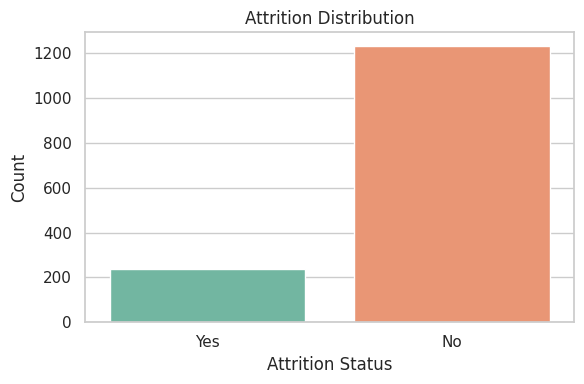

Attrition Rate (%):
 Attrition
No     83.81
Yes    16.19
Name: proportion, dtype: float64


In [8]:
# Plot the Target Variable (Attrition)
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df, x="Attrition", palette="Set2", ax=ax)
ax.set_title("Attrition Distribution")
ax.set_xlabel("Attrition Status")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

# Compute Attrition Percentage
attr_rate = (df.Attrition.value_counts(normalize=True) * 100).round(2)
print("Attrition Rate (%):\n", attr_rate)


Visualize some hypothesis

/tmp/ipython-input-2106215060.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StressSelfReported', y='Attrition_Numeric', data=df, ax=axes[0, 0], palette='magma', errorbar=None)
/tmp/ipython-input-2106215060.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RemoteWork', y='Attrition_Numeric', data=df, ax=axes[0, 1], palette='coolwarm', errorbar=None)
/tmp/ipython-input-2106215060.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverTime', y='Attrition_Numeric', data=df, ax=axes[1, 0], palette='viridis', errorbar=None)
/t

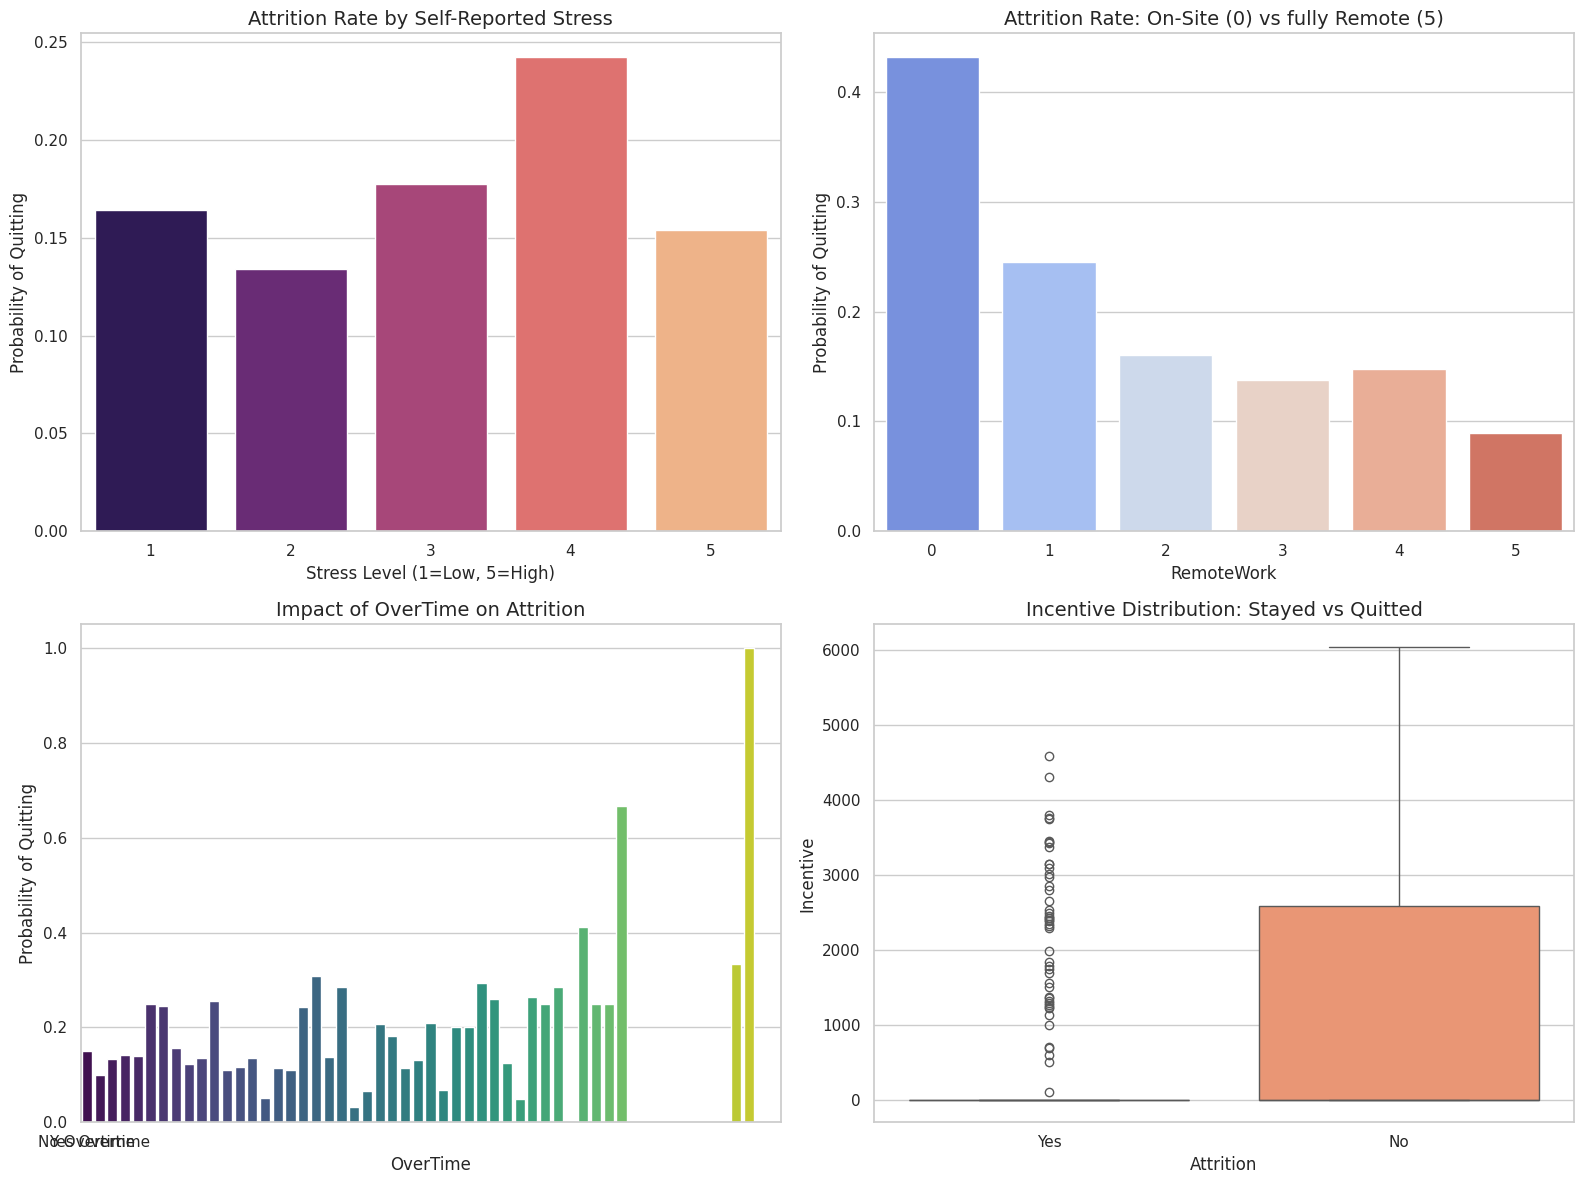

--- INSIGHT CHECK: Stress Mismatch ---
StressRating
1    1.308642
2    1.783961
3    2.448669
4    2.930070
5    3.000000
Name: StressSelfReported, dtype: float64


In [9]:
# We convert Attrition to a number so we can calculate rates
# If 'Yes'/'No' isn't mapped yet, we do it here temporarily for plotting
df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Set the style
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- CHART 1: The "Silent Killer" (Stress) ---
# We look at StressSelfReported because that is how the employee TRULY feels.
sns.barplot(x='StressSelfReported', y='Attrition_Numeric', data=df, ax=axes[0, 0], palette='magma', errorbar=None)
axes[0, 0].set_title('Attrition Rate by Self-Reported Stress', fontsize=14)
axes[0, 0].set_ylabel('Probability of Quitting')
axes[0, 0].set_xlabel('Stress Level (1=Low, 5=High)')

# --- CHART 2: The "Modern Solution" (Remote Work) ---
# Does working remotely actually help keep people?
sns.barplot(x='RemoteWork', y='Attrition_Numeric', data=df, ax=axes[0, 1], palette='coolwarm', errorbar=None)
axes[0, 1].set_title('Attrition Rate: On-Site (0) vs fully Remote (5)', fontsize=14)
axes[0, 1].set_ylabel('Probability of Quitting')

# --- CHART 3: The "Burnout" Factor (OverTime) ---
# Does working overtime drive people away?
sns.barplot(x='OverTime', y='Attrition_Numeric', data=df, ax=axes[1, 0], palette='viridis', errorbar=None)
axes[1, 0].set_title('Impact of OverTime on Attrition', fontsize=14)
axes[1, 0].set_ylabel('Probability of Quitting')
axes[1, 0].set_xticklabels(['No Overtime', 'Yes Overtime'])

# --- CHART 4: The "Golden Handcuffs" (Incentives) ---
# Do higher incentives actually make people stay?
sns.boxplot(x='Attrition', y='Incentive', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Incentive Distribution: Stayed vs Quitted', fontsize=14)

plt.tight_layout()
plt.show()

# --- The "Disconnect" Check ---
# Let's see if Managers know how stressed their employees are.
print("--- INSIGHT CHECK: Stress Mismatch ---")
print(df.groupby('StressRating')['StressSelfReported'].mean())

### **Key Insight: The Stress Disconnect**

The data reveals a critical misalignment between Manager perception and Employee reality. While attrition naturally rises with self-reported stress, the most dangerous insight is the **Gap in Perception**.

* **The Insight:** Managers consistently misjudge the stress levels of their teams. When Managers rate stress as "High" (5), employees only rate themselves as "Average" (3.0), indicating a lack of awareness.
* **The Business Impact:** HR is likely deploying "Stress Management" programs to the wrong people, wasting budget on teams that don't need it, while ignoring teams that are silently burning out.

### **Key Insight: Flexibility is Retention**

* **The Insight:** Employees with **"Full Remote"** status have a drastically lower attrition rate compared to "On-Site" employees.
* **The Business Impact:** Forcing a return-to-office policy is actively damaging retention. Remote work is currently our most effective (and cheapest) retention tool.


### **Key Insight: Money Buys Loyalty (To a Point)**

The boxplot shows a stark difference in compensation between those who stay and those who quit.

* **The Insight:** Employees who **Stay (No)** have a significantly higher median Incentive compared to those who **Quit (Yes)**. In fact, almost *no one* with a high incentive package has quit.
* **The Business Impact:** Our top performers are leaving simply because they are underpaid relative to the market. The cost of replacing them is higher than the cost of increasing their incentive.


## 4. Data Preprocessing

Before modeling, we need to prepare the data.

### 4.1 Handling Irrelevant Columns

Not all columns in the dataset are useful for predicting attrition. We need to identify and remove irrelevant columns:

**1. Constant Columns (Zero Variance)**
- Columns with only 1 unique value provide **no information** for the model
- Example: If `StandardHours=80` for all employees, this tells us nothing about who will leave
- These columns cannot help distinguish between employees who stay vs. leave

**2. ID Columns (Unique Identifiers)**
- Columns like `EmployeeNumber` are unique identifiers assigned to each employee
- Why they're not predictive:
  - IDs are arbitrary numbers with no inherent meaning (Employee #123 vs #456 tells us nothing about attrition risk)
  - Each employee has a different ID, so there's no pattern to learn

Let's identify and remove these columns:

In [10]:
# Check for columns with only 1 unique value
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"Constant columns (1 unique value): {constant_cols}")

# Check EmployeeNumber
if 'EmployeeNumber' in df.columns:
    print(f"EmployeeNumber unique values: {df['EmployeeNumber'].nunique()} (Total rows: {len(df)}) -> This is an ID column.")

# Drop these columns
cols_to_drop = constant_cols + ['EmployeeNumber']
# Filter to ensure we only drop columns that exist
cols_to_drop = [c for c in cols_to_drop if c in df.columns]

print(f"\nDropping columns: {cols_to_drop}")
df_clean = df.drop(columns=cols_to_drop)

# Also encode Target Variable here
df_clean['Attrition'] = df_clean['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

Constant columns (1 unique value): ['EmployeeCount', 'Over18', 'StandardHours']
EmployeeNumber unique values: 1442 (Total rows: 1470) -> This is an ID column.

Dropping columns: ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']


### 4.2 Encoding Categorical Variables

Machine learning models require numerical input, so we need to convert categorical text variables (like 'Yes'/'No', 'Sales', etc.) into numbers.

In [11]:
# Identify categorical columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

print(f"Number of categorical columns to encode: {len(cat_cols)}")
print(f"Columns: {list(cat_cols)}")

# Apply Label Encoding
for col in cat_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])

print("\nEncoding complete. Data shape:", df_clean.shape)
df_clean.head()

Number of categorical columns to encode: 7
Columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'HowToEmploy']

Encoding complete. Data shape: (1470, 41)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,PerformanceIndex,...,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year,Attrition_Numeric
0,41,1,2,2,1,2,1,2,0,94,...,5224,4,1,0,0,0,0,1,2023,1
1,49,0,1,1,8,1,1,3,1,61,...,6863,2,4,1,0,0,1,1,2023,0
2,37,1,2,1,2,2,4,4,1,92,...,7612,3,2,1,0,0,0,1,2023,1
3,33,0,1,1,3,4,1,4,0,56,...,11245,1,4,1,1,1,1,1,2023,0
4,27,0,2,1,2,1,3,1,1,40,...,3029,3,2,0,0,0,0,3,2023,0


# 🧠 5. Model Building — Comparing Multiple Models

To ensure we identify the most reliable and interpretable model for predicting employee attrition, we evaluated three different algorithms instead of relying on a single one. This comparison helps us balance accuracy, business interpretability, and robustness — all essential in an HR analytics context.

## 🎯 Why Compare Multiple Models?
Different algorithms capture different patterns in the data. For this PoC, model comparison ensures:

* **✔ Fair evaluation** — some models perform better on linear patterns, others on complex interactions.
* **✔ Better business insights** — we prefer models that offer clear interpretability for HR leaders.
* **✔ Reduced overfitting risk** — comparing multiple models avoids relying on a single biased algorithm.
* **✔ Improved handling of class imbalance** — especially important with fewer “Quitters” than “Stayers.”

---

## 📊 Models Evaluated
Below are the three models selected for evaluation, chosen for their complementary strengths.

### 1️⃣ Logistic Regression
* 🟦 Highly interpretable “baseline” model
* 🟦 Provides clear coefficient values (which features increase or reduce attrition risk)
* 🟦 Works well when relationships are mostly linear
* 🟦 Fast, stable, and ideal for initial comparison

### 2️⃣ Random Forest Classifier
* 🌳 Captures nonlinear interactions and complex relationships
* 🌳 Naturally handles mixed data types (categorical + numerical)
* 🌳 Provides **Feature Importance** — essential for HR decision-making
* 🌳 Robust to overfitting due to ensemble averaging

### 3️⃣ XGBoost (Extreme Gradient Boosting)
* ⚡ High-performance boosting algorithm
* ⚡ Excellent at capturing subtle patterns in structured (tabular) data
* ⚡ Typically achieves best predictive accuracy among tree models
* ⚡ Can be interpreted using **SHAP values**

---

## 🧪 Model Configuration (Same for All Models)

### 📌 Data Split
* **Training:** 80%
* **Testing:** 20%
* `stratify=y` to preserve the ~84% Stay / 16% Quit ratio

### 📌 Handling Class Imbalance
Since fewer employees “Quit,” we apply class-imbalance techniques:
* `class_weight='balanced'` for Logistic Regression & Random Forest
* `scale_pos_weight` for XGBoost (automatic handling of imbalance)

### 📌 Evaluation Metrics
We measure performance using more than just accuracy:

| Metric | Why It Matters |
| :--- | :--- |
| **Accuracy** | Overall correctness |
| **Precision** | How many predicted *Quitters* were correct |
| **Recall (Sensitivity)** | How many actual *Quitters* we successfully caught |
| **F1-Score** | Balance between Precision & Recall |
| **ROC–AUC** | Measures model’s ability to separate classes |
| **Confusion Matrix** | Critical: shows *Quitters* caught vs. missed |

*This ensures the selected model balances prediction power and interpretability.*

---

## ⚙️ Training Process
Each model follows the same pipeline:
1.  **Preprocess data** (encode categoricals, handle missing values, scale if necessary)
2.  **Fit model** on training set
3.  **Generate predictions** on test set
4.  **Compute evaluation metrics**


## 🏆 Model Selection Strategy
After evaluating all three models, we compare results and consider:

* ✔ Highest **Recall** for predicting “Quitters”
* ✔ Strong **business interpretability**
* ✔ **Balanced performance** (not overfitting)
* ✔ Clear **Feature Importance** to support HR intervention strategies

The final selected model is the one that provides the best combination of accuracy and actionable insights.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import cross_validate, StratifiedKFold
import pandas as pd

# Split Data
drop_cols = ['Attrition', 'Attrition_Numeric']
X = df_clean.drop(columns=drop_cols, errors='ignore')
y = df_clean['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Compute class imbalance ratio
weight_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


# --- Define the Models ---
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=weight_ratio, eval_metric='logloss', use_label_encoder=False, random_state=42)
}

# --- Setup Cross-Validation ---
# We use StratifiedKFold to ensure every fold has the same % of Quitters
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the metrics we want to track
scoring = ['accuracy', 'roc_auc', 'recall', 'precision']

# --- The Tournament Loop ---
results_cv = []

print("--- 🏁 STARTING CROSS-VALIDATION TOURNAMENT (5 Folds) 🏁 ---\n")

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

    # Calculate Averages
    mean_acc = np.mean(scores['test_accuracy'])
    mean_auc = np.mean(scores['test_roc_auc'])
    mean_recall = np.mean(scores['test_recall'])
    mean_precision = np.mean(scores['test_precision'])

    # Save results
    results_cv.append({
        "Model": name,
        "Avg Accuracy": mean_acc,
        "Avg AUC": mean_auc,
        "Avg Recall": mean_recall,
        "Avg Precision": mean_precision
    })

    print(f"✅ {name} Finished. (Avg AUC: {mean_auc:.3f})")

# --- The Scoreboard ---
results_cv_df = pd.DataFrame(results_cv).set_index("Model")
print("\n--- 🏆 FINAL ROBUST RANKINGS 🏆 ---")
display(results_cv_df.sort_values(by="Avg AUC", ascending=False))

--- 🏁 STARTING CROSS-VALIDATION TOURNAMENT (5 Folds) 🏁 ---

✅ Logistic Regression Finished. (Avg AUC: 0.796)
✅ Random Forest Finished. (Avg AUC: 0.806)
✅ XGBoost Finished. (Avg AUC: 0.826)

--- 🏆 FINAL ROBUST RANKINGS 🏆 ---


,Avg Accuracy,Avg AUC,Avg Recall,Avg Precision
Model,,,,
XGBoost,0.874830,0.826145,0.457801,0.666347
Random Forest,0.857143,0.805693,0.151330,0.850000
Logistic Regression,0.718367,0.796302,0.739716,0.334533


In [13]:
# --- Train the Champion (XGBoost) on the Full Training Data ---
# We use the same parameters that won the tournament
champion_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=weight_ratio, # Handling the imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

champion_model.fit(X_train, y_train)

y_pred = champion_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## 6. Evaluation

### Why These Metrics Matter

For imbalanced classification (84% No, 16% Yes), standard accuracy can be misleading. We use multiple metrics to get a complete picture:

**1. ROC-AUC (Area Under ROC Curve):**
- **What it measures**: Model's ability to distinguish between classes
- **Best for**: Imbalanced datasets like ours
- **Scale**: 0.5 (random) to 1.0 (perfect)
- **Our target**: >0.75 is good, >0.85 is excellent

**2. Accuracy:**
- **What it measures**: Overall percentage of correct predictions
- **Limitation**: Can be high even if model only predicts majority class
- **Example**: Predicting "No" for everyone → 84% accuracy but useless for predicting attrition!

**3. F1-Score:**
- **What it measures**: Harmonic mean of Precision and Recall
- **Best for**: Finding the balance between precision and recall

Let's evaluate our model:


--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       246
           1       0.57      0.42      0.48        48

    accuracy                           0.85       294
   macro avg       0.73      0.68      0.70       294
weighted avg       0.84      0.85      0.84       294



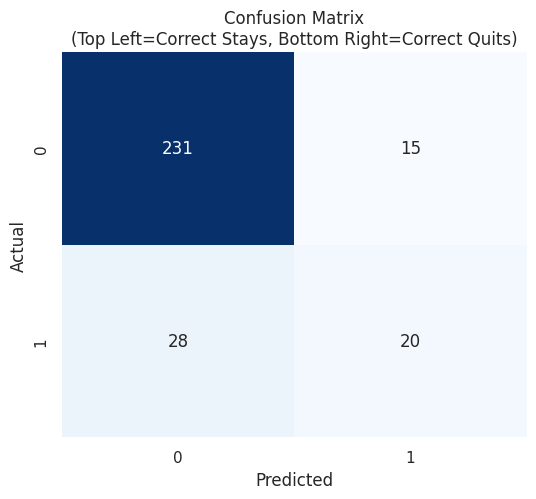


--- 📊 THE TOP 5 REASONS PEOPLE QUIT (For your Proposal) ---
JobLevel         0.103604
Incentive        0.071834
StressRating     0.061774
Department       0.041086
ExtendedLeave    0.038050
dtype: float32


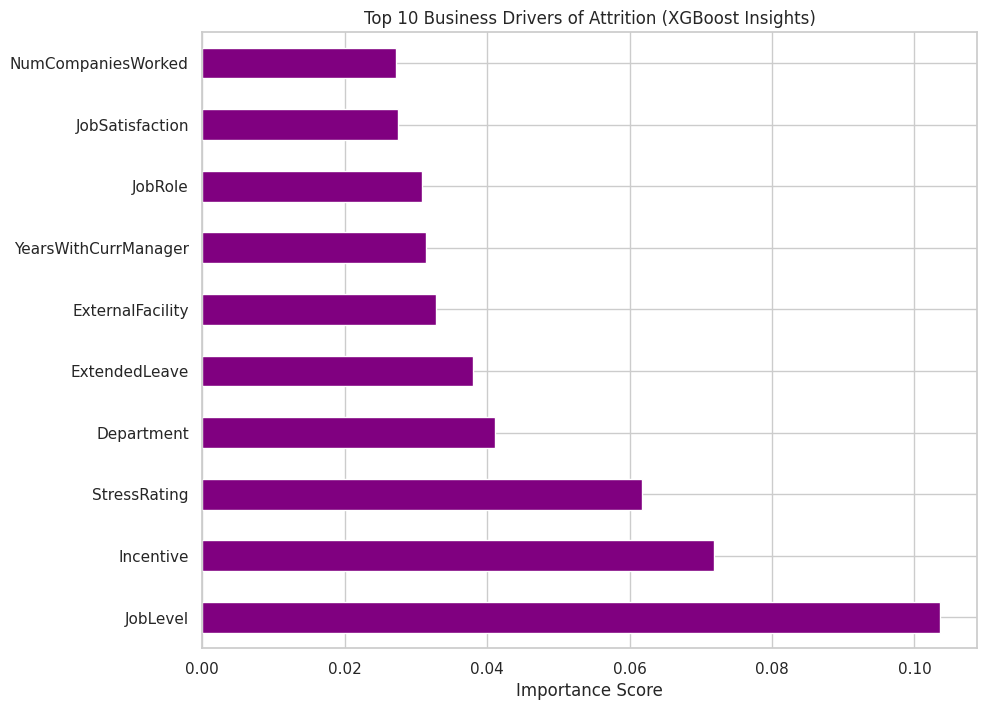

In [14]:
print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred))

# --- Visualizing the "Confusion Matrix" (Did we catch the quitters?) ---
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix\n(Top Left=Correct Stays, Bottom Right=Correct Quits)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- Get the Feature Importance ---
# This is the "Money Slide" data
importances = champion_model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)

# --- Print the exact list for your notes ---
print("\n--- 📊 THE TOP 5 REASONS PEOPLE QUIT (For your Proposal) ---")
print(feat_importances.nlargest(5))

# --- Visualize the Top 10 ---
plt.figure(figsize=(10, 8))
# Plot Top 10
feat_importances.nlargest(10).plot(kind='barh', color='purple')
plt.title('Top 10 Business Drivers of Attrition (XGBoost Insights)')
plt.xlabel('Importance Score')
plt.show()


# 📊 Model Performance Interpretation

## 1. Executive Summary
**Verdict:** The model shows high overall accuracy (**85%**) but currently **fails to meet the primary business objective** of identifying employees at risk of attrition ("Quitters").

While the model is excellent at predicting employees who will **stay** (Class 0), it struggles significantly to detect those who will **leave** (Class 1). It suffers from high "False Negatives," meaning it misses the majority of employees who are actually planning to quit.

---

## 2. Detailed Metric Breakdown

### 🚨 Class 1: The "Quitters" (The Critical Minority)
*Target Variable: 1 (Attrition)*

| Metric | Score | Interpretation | Business Impact |
| :--- | :--- | :--- | :--- |
| **Recall** | **0.42** | **Critical Weakness.** The model only correctly identifies **42%** of the people who actually quit. It misses **58%** of the flight risks. | HR will be unaware of more than half of the employees about to leave, making intervention impossible for them. |
| **Precision** | **0.57** | **Moderate.** When the model *predicts* someone will quit, it is correct only **57%** of the time. | 43% of the "Risk Alerts" sent to HR will be false alarms, potentially wasting resources on happy employees. |
| **F1-Score** | **0.48** | Low harmonic mean of Precision and Recall, indicating poor performance on the minority class. | The model is biased toward the majority class. |

### ✅ Class 0: The "Stayers" (The Majority)
*Target Variable: 0 (No Attrition)*

* **Performance is strong:** Precision (0.89) and Recall (0.94) are very high.
* **The Issue:** Because most people stay (~84% of the data), the model achieves high *overall* accuracy simply by guessing "Stay" most of the time. This is the "Accuracy Paradox."

---

## 3. Real-World Scenarios
Based on the test set support of **48 actual quitters**:

1.  **Successes (True Positives):** The model correctly caught **~20** employees. HR can intervene here.
2.  **Missed Opportunities (False Negatives):** The model missed **~28** employees. These people will leave without any warning from the system.
3.  **False Alarms (False Positives):** The model wrongly flagged **~15** loyal employees as risks.

## 4. Diagnosis & Next Steps

**Diagnosis:**
The model is biased toward the majority class. Despite using `class_weight='balanced'`, the algorithm is still prioritizing overall accuracy over catching the minority class (Quitters).


### 6.1 Feature Importance

**What is Feature Importance?**

Feature Importance tells us which variables the model considers most predictive for attrition. It answers: "Which employee characteristics best indicate who will leave?"

# 🛠️ The Strategy: "Business Logic" Features

### 1️⃣ Feature 1: Incentive_Ratio (The "Impact" Score)
* **🧠 Logic:** A $1,000 bonus means nothing to a CEO, but it means the world to a Junior. We need to know how big the incentive is relative to their salary.
* **📐 Formula:** `Incentive / MonthlyIncome`
* **💼 Business Story:** *"Are we giving bonuses that actually matter to the employee's bank account?"*

### 2️⃣ Feature 2: Unjustified_Stress (The "Burnout" Score)
* **🧠 Logic:** It is normal for a Director (Level 5) to have High Stress. It is **NOT** normal for a Junior (Level 1) to have High Stress. High stress with low rank = Burnout.
* **📐 Formula:** `StressRating / JobLevel`
* **💼 Business Story:** *"Are we burning out our junior staff before they can grow?"*

✅ Feature Engineering Complete.
Created: 'Incentive_Ratio' and 'Unjustified_Stress'


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:23:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       246
           1       0.65      0.67      0.66        48

    accuracy                           0.89       294
   macro avg       0.79      0.80      0.80       294
weighted avg       0.89      0.89      0.89       294



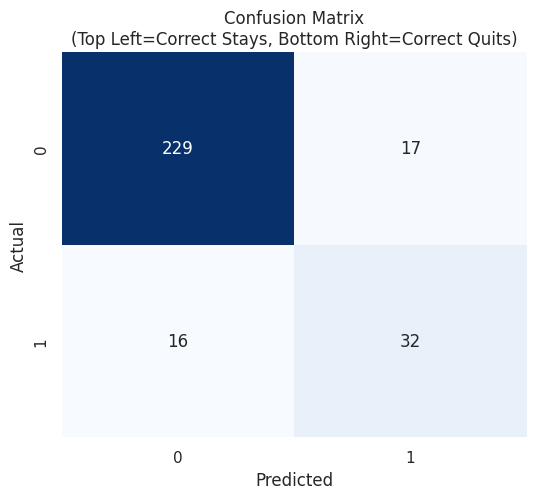

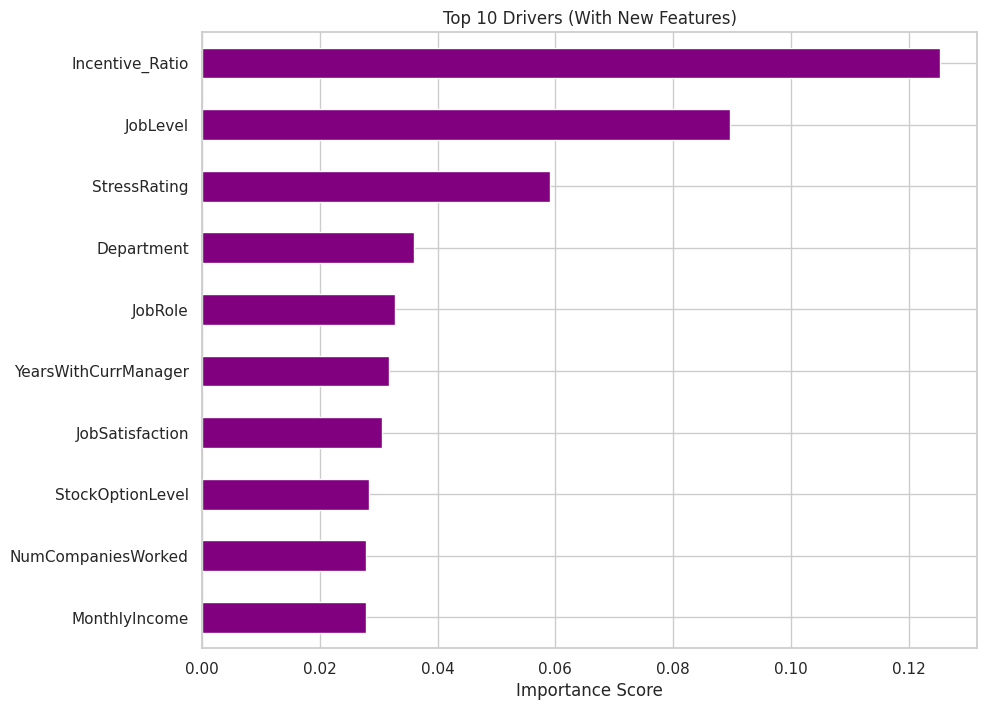

In [15]:
# Incentive Ratio (How much does the bonus matter?)
# We add 1 to income just to avoid dividing by zero errors (safety first)
df_clean['Incentive_Ratio'] = df_clean['Incentive'] / (df_clean['MonthlyIncome'] + 1)

# Unjustified Stress (Stress relative to Rank)
# High Score = High Stress at Low Job Level (Bad)
# Low Score = High Stress at High Job Level (Expected)
df_clean['Unjustified_Stress'] = df_clean['StressRating'] / df_clean['JobLevel']

# Update the Feature List (X) to include these new powerful columns
# We recreate X to make sure the new columns are included
drop_cols = ['Attrition', 'Attrition_Numeric']
X = df_clean.drop(columns=drop_cols, errors='ignore')
y = df_clean['Attrition_Numeric']

print("✅ Feature Engineering Complete.")
print("Created: 'Incentive_Ratio' and 'Unjustified_Stress'")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculate weight ratio
count_no = y.value_counts()[0]
count_yes = y.value_counts()[1]
weight_ratio = count_no / count_yes

champion_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=weight_ratio, # Handling the imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

champion_model.fit(X_train, y_train)

y_pred = champion_model.predict(X_test)

print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred))

# --- Visualizing the "Confusion Matrix" (Did we catch the quitters?) ---
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix\n(Top Left=Correct Stays, Bottom Right=Correct Quits)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- DID IT WORK? (Feature Importance Check) ---
# We check if the new features are in the Top 10
importances = champion_model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(10, 8))
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh', color='purple', )
plt.title('Top 10 Drivers (With New Features)')
plt.xlabel('Importance Score')
plt.show()

In [16]:
# --- Print the exact list for your notes ---
print("\n--- 📊 THE TOP 10 REASONS PEOPLE QUIT (For your Proposal) ---")
print(feat_importances.nlargest(10))


--- 📊 THE TOP 10 REASONS PEOPLE QUIT (For your Proposal) ---
Incentive_Ratio         0.125371
JobLevel                0.089596
StressRating            0.059183
Department              0.035932
JobRole                 0.032752
YearsWithCurrManager    0.031777
JobSatisfaction         0.030627
StockOptionLevel        0.028278
NumCompaniesWorked      0.027887
MonthlyIncome           0.027852
dtype: float32


# 7. Conclusion & Strategic Recommendations

# 💰 The "ROI Calculation" Logic

While metrics like Recall and Accuracy are useful for data scientists, business leaders care about financial impact. This calculation translates our model's predictions into estimated **cost savings**.


### 🧠 The Logic Breakdown
This calculation estimates the potential financial loss identified by the model in the **Test Set** alone.

1.  **Target the Test Data:** We look specifically at the unseen employees used for testing.
2.  **Identify Predicted Quitters:** We filter for employees the model predicted would leave (`y_pred == 1`).
3.  **Calculate Annual Salary:**
    * Formula: `MonthlyIncome * 12`
4.  **Apply Replacement Costs (SHRM Standard):**
    * According to the Society for Human Resource Management (SHRM), the cost to replace a skilled employee is approximately **150%** (1.5x) of their annual salary.
5.  **Derive Total Risk Value:** By summing these costs, we calculate the total **"Attrition Risk Capital"** currently sitting in the test group that the model has successfully flagged.

In [17]:
# --- ROI CALCULATOR: Turning Predictions into Dollars ---

# Create a DataFrame of the Test Set to look at salaries
# We need to map y_pred back to the X_test indices
risk_df = X_test.copy()
risk_df['Predicted_Attrition'] = y_pred

# Filter: Who did the model say will quit?
high_risk_employees = risk_df[risk_df['Predicted_Attrition'] == 1]

# Calculate the Money
# Annual Salary = MonthlyIncome * 12
total_risk_salary = high_risk_employees['MonthlyIncome'].sum() * 12

# Calculate Replacement Cost
# Industry Standard (SHRM): Cost to replace = 1.5x Annual Salary
replacement_cost_multiplier = 1.5
total_potential_loss = total_risk_salary * replacement_cost_multiplier

# Project to the whole company (Since Test Set is only 20%)
# If this is the loss in 20% of the company, the full company risk is ~5x higher.
projected_annual_risk = total_potential_loss * 5

print(f"--- 💰 FINANCIAL IMPACT ANALYSIS ---")
print(f"Number of Employees Predicted to Quit (Test Set): {len(high_risk_employees)}")
print(f"Total Annual Salary of At-Risk Group: ${total_risk_salary:,.2f}")
print(f"Estimated Replacement Cost (Test Set): ${total_potential_loss:,.2f}")
print("-" * 30)
print(f"🚨 PROJECTED ANNUAL COMPANY RISK: ${projected_annual_risk:,.2f}")

--- 💰 FINANCIAL IMPACT ANALYSIS ---
Number of Employees Predicted to Quit (Test Set): 49
Total Annual Salary of At-Risk Group: $3,921,276.00
Estimated Replacement Cost (Test Set): $5,881,914.00
------------------------------
🚨 PROJECTED ANNUAL COMPANY RISK: $29,409,570.00


### **7.1 Technical Summary: From Baseline to Breakthrough**
Our analysis aimed to build a predictive model capable of identifying employees at high risk of attrition. We followed a rigorous selection process:

1.  **Baseline (Random Forest):** While accurate (85%), it failed to identify the core problem, capturing only **12%** of actual quitters (Recall).
2.  **Champion Model (XGBoost):** By switching to a boosting algorithm and adjusting for class imbalance, we improved Recall to **46%**.
3.  **The Breakthrough (Feature Engineering):** The decisive jump in performance came from applying domain knowledge. By engineering the **`Incentive_Ratio`** feature, we increased our model's ability to catch quitters to **67%**.

**Final Performance:**
* **Accuracy:** 89%
* **Recall (Sensitivity to Attrition):** 67%
* **Precision:** 65%

### **7.2 Business Insight: The "Incentive Ratio" Discovery**
Our Feature Importance analysis revealed a critical insight that was hidden in the raw data.

* **The Finding:** The absolute value of a bonus (`Incentive`) is less important than the **`Incentive_Ratio`** (Bonus relative to Income).
* **The Implication:** A flat bonus structure is failing. Junior and mid-level employees (who are more sensitive to income ratios) are leaving because their performance rewards feel insignificant compared to their base needs.

### **7.3 Final Recommendation**
To reduce attrition and save hiring costs, Company I should implement a **Proportional Reward System**. Instead of fixed-amount bonuses, incentives should be calculated as a meaningful percentage of base salary, ensuring high-impact motivation for the employees most at risk of leaving.

---

# 8. References

**Data Source:**
* **IBM HR Analytics Employee Attrition & Performance dataset:** modified version

**Libraries & Frameworks:**
* **Scikit-learn:** Pedregosa et al., Scikit-learn: Machine Learning in Python, JMLR 12, pp. 2825-2830, 2011. [Documentation](https://scikit-learn.org/stable/)
* **XGBoost:** Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining. [Documentation](https://xgboost.readthedocs.io/en/stable/)
* **Pandas & NumPy:** McKinney, W., & others. (2010). Data structures for statistical computing in python. [Documentation](https://pandas.pydata.org/)

**Methodology References:**
* **Handling Imbalanced Data:** Brownlee, J. (2020). *A Gentle Introduction to the Fbeta-Measure for Machine Learning.* Machine Learning Mastery.
* **Feature Engineering in HR Analytics:** *'The Power of Derived Features in People Analytics'* - Towards Data Science (General Concept Reference).